# Step 1: Installing the dependencies

In [ ]:
! pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 18.6 MB/s eta 0:00:00


# Step 2 : Importing the libraries

In [4]:
from ultralytics import YOLO
import shutil
import numpy as np
from rich import print
print("Everything Imported Succesfully")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Everything Imported Succesfully

# Step 3: Loading the data from Sources

In [2]:
# Unzipping the zip file
!unzip "/content/archive.zip"

Archive:  /content/archive.zip
  inflating: aquarium_pretrain/README.dataset.txt  
  inflating: aquarium_pretrain/README.roboflow.txt  
  inflating: aquarium_pretrain/data.yaml  
  inflating: aquarium_pretrain/test/images/IMG_2289_jpeg_jpg.rf.fe2a7a149e7b11f2313f5a7b30386e85.jpg  
  inflating: aquarium_pretrain/test/images/IMG_2301_jpeg_jpg.rf.2c19ae5efbd1f8611b5578125f001695.jpg  
  inflating: aquarium_pretrain/test/images/IMG_2319_jpeg_jpg.rf.6e20bf97d17b74a8948aa48776c40454.jpg  
  inflating: aquarium_pretrain/test/images/IMG_2347_jpeg_jpg.rf.7c71ac4b9301eb358cd4a832844dedcb.jpg  
  inflating: aquarium_pretrain/test/images/IMG_2354_jpeg_jpg.rf.396e872c7fb0a95e911806986995ee7a.jpg  
  inflating: aquarium_pretrain/test/images/IMG_2371_jpeg_jpg.rf.54505f60b6706da151c164188c305849.jpg  
  inflating: aquarium_pretrain/test/images/IMG_2379_jpeg_jpg.rf.7dc3160c937072d26d4624c6c48e904d.jpg  
  inflating: aquarium_pretrain/test/images/IMG_2380_jpeg_jpg.rf.a23809682eb1466c1136ca0f55de8fb5.jpg

# Important Note ⚠️
The above function will only load the face and QR/barcode datasets. For the face dataset, we have merged four datasets (three publicly available and one personally created). So instead of training the model yourself, you can simply access the pre-trained model provided by us whereas for the QR-Barcode and face model training follow next steps.

`Before moving further` : Make sure the data.yaml file is updated with your system path, and the folder structure looks something like this:

- Main Folder
    - train
        - images
        - labels
    - val
        - images
        - labels

Make sure the names of the folders are exactly as mentioned above and the data.yaml file is updated with your own system paths correctly; otherwise, the training will not start.

# Step 4 : Training Model


In [5]:
def train_model(yaml_file_path, model_weights="yolo11n.pt", epochs=100, imgsz=640):

    # Load the YOLO model with the specified weights
    model = YOLO(model_weights)

    # Train the model with the provided YAML file path
    results = model.train(data=yaml_file_path, epochs=epochs, imgsz=imgsz)

    return results

# Example usage
yaml_file_path = "/content/aquarium_pretrain/data.yaml"
results = train_model(yaml_file_path)

100%|██████████| 5.35M/5.35M [00:00<00:00, 179MB/s]


Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/aquarium_pretrain/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

100%|██████████| 755k/755k [00:00<00:00, 44.3MB/s]


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/aquarium_pretrain/train/labels... 448 images, 1 backgrounds, 0 corrupt: 100%|██████████| 448/448 [00:00<00:00, 1743.23it/s]

train: New cache created: /content/aquarium_pretrain/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/aquarium_pretrain/val/labels... 127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 127/127 [00:00<00:00, 1517.98it/s]

val: New cache created: /content/aquarium_pretrain/val/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.85G      1.548       3.84      1.277        179        640: 100%|██████████| 28/28 [00:14<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]

                   all        127        909     0.0134      0.485     0.0465     0.0265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.81G      1.568      3.078      1.239        243        640: 100%|██████████| 28/28 [00:09<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.41it/s]

                   all        127        909     0.0119       0.52      0.101     0.0517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.84G      1.657      2.502      1.297        281        640: 100%|██████████| 28/28 [00:08<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.10it/s]

                   all        127        909      0.576      0.107      0.185     0.0965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.78G      1.614       2.24      1.297        300        640: 100%|██████████| 28/28 [00:10<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]

                   all        127        909      0.293      0.282      0.232       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.93G      1.593       2.03      1.273        189        640: 100%|██████████| 28/28 [00:11<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.16it/s]

                   all        127        909      0.413      0.394      0.375      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.89G      1.556      1.916      1.265        300        640: 100%|██████████| 28/28 [00:10<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.38it/s]

                   all        127        909      0.419      0.486      0.389      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.68G      1.541      1.845      1.251        220        640: 100%|██████████| 28/28 [00:08<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

                   all        127        909      0.522      0.428      0.452      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.09G      1.538      1.781      1.253        277        640: 100%|██████████| 28/28 [00:09<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all        127        909      0.539       0.44      0.463      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.83G      1.502      1.651       1.22        164        640: 100%|██████████| 28/28 [00:11<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        127        909       0.65      0.496      0.516      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.89G      1.463      1.612      1.214        216        640: 100%|██████████| 28/28 [00:11<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]

                   all        127        909      0.606      0.529       0.54      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.82G      1.472       1.61      1.232        174        640: 100%|██████████| 28/28 [00:09<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.43it/s]

                   all        127        909      0.576      0.548      0.527      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.68G      1.429      1.527      1.186        161        640: 100%|██████████| 28/28 [00:08<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]

                   all        127        909      0.569      0.595      0.573      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.89G      1.473      1.528      1.213        196        640: 100%|██████████| 28/28 [00:11<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]

                   all        127        909      0.691      0.503      0.584      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.15G      1.466      1.489      1.204        145        640: 100%|██████████| 28/28 [00:11<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.51it/s]

                   all        127        909      0.598      0.585      0.593       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.77G      1.437      1.447      1.211        164        640: 100%|██████████| 28/28 [00:09<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]

                   all        127        909      0.681       0.62      0.651       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.81G      1.433      1.429      1.191        185        640: 100%|██████████| 28/28 [00:08<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]

                   all        127        909       0.69      0.624      0.638      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.83G      1.429      1.394      1.191        135        640: 100%|██████████| 28/28 [00:11<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        127        909      0.743       0.57       0.66      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.87G      1.432      1.348      1.187        251        640: 100%|██████████| 28/28 [00:11<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all        127        909      0.704      0.626      0.667      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.66G      1.379      1.322      1.178        186        640: 100%|██████████| 28/28 [00:10<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.38it/s]

                   all        127        909      0.682      0.581      0.621       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.68G      1.403      1.312      1.173        138        640: 100%|██████████| 28/28 [00:08<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.19it/s]

                   all        127        909      0.699      0.635      0.655       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.86G      1.335      1.229      1.137        187        640: 100%|██████████| 28/28 [00:10<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.63it/s]

                   all        127        909       0.66      0.607      0.632      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.66G      1.365       1.23      1.171        227        640: 100%|██████████| 28/28 [00:11<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.67it/s]

                   all        127        909      0.668      0.556      0.597      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.66G      1.346      1.233      1.146        179        640: 100%|██████████| 28/28 [00:10<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]

                   all        127        909       0.72      0.651      0.702      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.81G      1.316      1.196      1.141        218        640: 100%|██████████| 28/28 [00:08<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]

                   all        127        909       0.79      0.653      0.725      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100       2.9G      1.332       1.17      1.128        212        640: 100%|██████████| 28/28 [00:09<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all        127        909      0.757       0.62       0.68      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.86G       1.33      1.176      1.143        158        640: 100%|██████████| 28/28 [00:11<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]

                   all        127        909      0.746      0.618      0.696      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       2.7G      1.332      1.179       1.14        236        640: 100%|██████████| 28/28 [00:11<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]

                   all        127        909      0.746      0.644      0.717      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100       2.7G      1.312       1.16      1.141        182        640: 100%|██████████| 28/28 [00:08<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]

                   all        127        909      0.795      0.666      0.736      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       2.9G      1.329      1.138       1.13        188        640: 100%|██████████| 28/28 [00:09<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

                   all        127        909      0.751      0.594      0.661      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.96G      1.318      1.136      1.135        176        640: 100%|██████████| 28/28 [00:11<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        127        909      0.734      0.697      0.724      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.86G      1.313      1.107      1.129        155        640: 100%|██████████| 28/28 [00:11<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.09it/s]

                   all        127        909      0.766      0.658       0.72      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.86G      1.283      1.115       1.12        131        640: 100%|██████████| 28/28 [00:08<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]

                   all        127        909      0.784       0.62      0.711       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.71G      1.286      1.056        1.1        208        640: 100%|██████████| 28/28 [00:09<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.71it/s]

                   all        127        909      0.757      0.641      0.695      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.23G      1.291      1.056      1.118        185        640: 100%|██████████| 28/28 [00:11<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.60it/s]

                   all        127        909      0.752       0.68      0.715      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.65G      1.276      1.063      1.113        149        640: 100%|██████████| 28/28 [00:12<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.46it/s]

                   all        127        909      0.745      0.683      0.729      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.79G      1.263      1.029      1.108        139        640: 100%|██████████| 28/28 [00:09<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.41it/s]

                   all        127        909      0.768      0.705      0.743      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.72G      1.274      1.031      1.106        190        640: 100%|██████████| 28/28 [00:09<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]

                   all        127        909      0.754      0.677      0.726      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.85G       1.24     0.9994        1.1        164        640: 100%|██████████| 28/28 [00:11<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.63it/s]

                   all        127        909      0.783      0.635       0.72      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.78G      1.313      1.051      1.113        147        640: 100%|██████████| 28/28 [00:11<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]

                   all        127        909      0.721       0.72      0.733      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.64G      1.241      1.008      1.105        165        640: 100%|██████████| 28/28 [00:08<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.35it/s]

                   all        127        909       0.77      0.675      0.729       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.08G      1.235     0.9927      1.094        209        640: 100%|██████████| 28/28 [00:08<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]

                   all        127        909      0.723      0.681      0.721      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.68G      1.253      0.993      1.107        274        640: 100%|██████████| 28/28 [00:11<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all        127        909      0.777      0.669      0.737       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.81G      1.233     0.9701      1.092        154        640: 100%|██████████| 28/28 [00:12<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]

                   all        127        909      0.737      0.651      0.689      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.64G      1.256     0.9576      1.087        179        640: 100%|██████████| 28/28 [00:09<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all        127        909      0.801       0.69      0.752      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.63G      1.213     0.9615      1.082        213        640: 100%|██████████| 28/28 [00:08<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.66it/s]

                   all        127        909       0.82      0.633      0.742      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.55G      1.233     0.9408      1.085        205        640: 100%|██████████| 28/28 [00:11<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]

                   all        127        909      0.798      0.682       0.76      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.85G       1.22     0.9363      1.084        191        640: 100%|██████████| 28/28 [00:11<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]

                   all        127        909      0.781      0.692      0.757      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.67G      1.195     0.9217      1.069        263        640: 100%|██████████| 28/28 [00:10<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]

                   all        127        909      0.776       0.65      0.732      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.75G      1.205      0.926      1.092        216        640: 100%|██████████| 28/28 [00:08<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.45it/s]

                   all        127        909      0.722       0.72       0.76      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.79G      1.188     0.9195      1.074        127        640: 100%|██████████| 28/28 [00:10<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.49it/s]

                   all        127        909      0.787      0.675      0.737      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.74G      1.213     0.9311       1.08        218        640: 100%|██████████| 28/28 [00:11<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

                   all        127        909      0.775      0.686      0.742      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.67G      1.209     0.9134      1.075         81        640: 100%|██████████| 28/28 [00:10<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        127        909      0.763      0.689      0.743       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.05G      1.177     0.9007      1.078        227        640: 100%|██████████| 28/28 [00:08<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.94it/s]

                   all        127        909      0.807       0.68      0.751      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.83G      1.173     0.9028      1.063        154        640: 100%|██████████| 28/28 [00:09<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]

                   all        127        909      0.821      0.679      0.751      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.81G      1.173     0.8678       1.07        215        640: 100%|██████████| 28/28 [00:11<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.91it/s]

                   all        127        909      0.749      0.709      0.744      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.68G      1.175     0.8574      1.062        169        640: 100%|██████████| 28/28 [00:10<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]

                   all        127        909      0.805      0.663      0.737      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.62G       1.17     0.8646      1.054        189        640: 100%|██████████| 28/28 [00:08<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]

                   all        127        909      0.768      0.717      0.761       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.82G      1.145     0.8478      1.059        262        640: 100%|██████████| 28/28 [00:09<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.97it/s]

                   all        127        909      0.751      0.699      0.741      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.75G       1.17     0.8487      1.064        258        640: 100%|██████████| 28/28 [00:11<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.48it/s]

                   all        127        909      0.801      0.682      0.757      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.05G      1.151     0.8421      1.057        193        640: 100%|██████████| 28/28 [00:11<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]

                   all        127        909       0.81      0.706      0.757      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.79G       1.14     0.8282       1.05        165        640: 100%|██████████| 28/28 [00:08<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]

                   all        127        909      0.813      0.707      0.759      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.95G       1.15     0.8356      1.038        241        640: 100%|██████████| 28/28 [00:09<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]

                   all        127        909      0.795      0.711       0.76      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.68G      1.136      0.836      1.057        180        640: 100%|██████████| 28/28 [00:11<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.53it/s]

                   all        127        909      0.792      0.726      0.761      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.81G      1.136     0.8101      1.045        129        640: 100%|██████████| 28/28 [00:11<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        127        909      0.805      0.727       0.77      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.84G      1.133       0.82      1.043        117        640: 100%|██████████| 28/28 [00:09<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

                   all        127        909      0.804      0.716      0.769      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.78G      1.093     0.7983      1.019        236        640: 100%|██████████| 28/28 [00:08<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.67it/s]

                   all        127        909      0.779      0.734      0.774      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.76G      1.142     0.7861      1.039        222        640: 100%|██████████| 28/28 [00:10<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]

                   all        127        909      0.791      0.714      0.775      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.54G      1.114     0.7958      1.034        149        640: 100%|██████████| 28/28 [00:11<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.50it/s]

                   all        127        909       0.79      0.707      0.763      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.77G      1.116     0.7898      1.033        182        640: 100%|██████████| 28/28 [00:10<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]

                   all        127        909      0.786      0.723      0.772      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.81G       1.11       0.79       1.03        165        640: 100%|██████████| 28/28 [00:08<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]

                   all        127        909      0.789      0.693       0.76      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.97G      1.072     0.7701      1.022        176        640: 100%|██████████| 28/28 [00:10<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.46it/s]

                   all        127        909      0.808      0.695      0.768      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.95G      1.069     0.7559      1.022        242        640: 100%|██████████| 28/28 [00:11<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.01it/s]

                   all        127        909      0.791      0.725      0.771       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100       2.9G      1.113     0.7823      1.026        178        640: 100%|██████████| 28/28 [00:10<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

                   all        127        909       0.79      0.714       0.77      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.13G      1.088     0.7635      1.018        284        640: 100%|██████████| 28/28 [00:08<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        127        909      0.779      0.716      0.761      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100       2.8G      1.046     0.7445      1.008        223        640: 100%|██████████| 28/28 [00:10<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]

                   all        127        909      0.763      0.703      0.748      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.86G      1.093     0.7541      1.032        181        640: 100%|██████████| 28/28 [00:11<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]

                   all        127        909      0.801      0.698      0.765      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.64G      1.089     0.7398      1.025        196        640: 100%|██████████| 28/28 [00:10<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all        127        909      0.807      0.681      0.766      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.74G      1.075     0.7488      1.009        121        640: 100%|██████████| 28/28 [00:08<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.00it/s]

                   all        127        909      0.818      0.703      0.773      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.65G      1.067     0.7459       1.01        177        640: 100%|██████████| 28/28 [00:10<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.66it/s]

                   all        127        909      0.853      0.701      0.785      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.86G      1.032     0.7326      1.009        207        640: 100%|██████████| 28/28 [00:11<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]

                   all        127        909      0.808      0.707      0.775      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.95G      1.069      0.734       1.01        222        640: 100%|██████████| 28/28 [00:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]

                   all        127        909      0.795      0.696      0.754       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.57G      1.029     0.7156     0.9963        212        640: 100%|██████████| 28/28 [00:08<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.89it/s]

                   all        127        909      0.769      0.698      0.749       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.69G      1.027     0.7104      1.002        175        640: 100%|██████████| 28/28 [00:10<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.57it/s]

                   all        127        909      0.806      0.701      0.765      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100         3G       1.06     0.7278      1.008        144        640: 100%|██████████| 28/28 [00:11<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

                   all        127        909      0.763      0.737      0.759      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.69G      1.015     0.7064     0.9986        229        640: 100%|██████████| 28/28 [00:11<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]

                   all        127        909      0.748      0.753      0.771      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.67G       1.02     0.6917     0.9879        122        640: 100%|██████████| 28/28 [00:08<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]

                   all        127        909      0.797      0.726      0.767       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.58G      1.024     0.6989     0.9929        154        640: 100%|██████████| 28/28 [00:09<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.71it/s]

                   all        127        909      0.775      0.729      0.768      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.69G      1.042     0.7035      1.006        163        640: 100%|██████████| 28/28 [00:12<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]

                   all        127        909      0.776      0.734      0.772      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.62G      1.016     0.7045          1        289        640: 100%|██████████| 28/28 [00:11<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.59it/s]

                   all        127        909      0.788      0.719      0.772      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100         3G       1.03     0.6941     0.9921        152        640: 100%|██████████| 28/28 [00:09<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]

                   all        127        909      0.774      0.727      0.768      0.458


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.72G     0.9867     0.7127     0.9837         82        640: 100%|██████████| 28/28 [00:10<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all        127        909      0.812      0.676      0.753      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100       2.6G     0.9851     0.6806     0.9757        134        640: 100%|██████████| 28/28 [00:10<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all        127        909      0.769      0.711      0.756      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100       2.6G     0.9583     0.6434     0.9653        127        640: 100%|██████████| 28/28 [00:12<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]

                   all        127        909      0.808      0.676      0.753      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.67G     0.9568     0.6412     0.9651         87        640: 100%|██████████| 28/28 [00:09<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        127        909      0.798      0.685      0.756      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.71G      0.957     0.6429     0.9744        163        640: 100%|██████████| 28/28 [00:08<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]

                   all        127        909      0.751      0.728      0.758       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.58G      0.947     0.6278      0.963        100        640: 100%|██████████| 28/28 [00:10<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]

                   all        127        909      0.776      0.712      0.761      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.59G     0.9651     0.6378     0.9736        132        640: 100%|██████████| 28/28 [00:12<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]

                   all        127        909      0.776       0.72      0.764      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.63G     0.9551     0.6185     0.9615        122        640: 100%|██████████| 28/28 [00:08<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        127        909      0.767      0.717      0.758      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.64G     0.9181     0.6194     0.9529        103        640: 100%|██████████| 28/28 [00:08<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]

                   all        127        909      0.776      0.706      0.759      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.72G     0.9371      0.616     0.9578        130        640: 100%|██████████| 28/28 [00:11<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]

                   all        127        909      0.773      0.711      0.759      0.457



100 epochs completed in 0.371 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


                   all        127        909      0.789      0.714      0.769      0.472
                  fish         63        459      0.798      0.763      0.795      0.447
             jellyfish          9        155      0.877       0.89       0.92       0.52
               penguin         17        104      0.716      0.644      0.736      0.335
                puffin         15         74      0.719      0.581      0.591      0.294
                 shark         28         57        0.8      0.632      0.726        0.5
              starfish         17         27      0.822      0.704      0.763       0.59
              stingray         23         33      0.793      0.788      0.851      0.623
Speed: 0.2ms preprocess, 2.6ms inference, 0.0ms loss, 4.1ms postprocess per image
Results saved to runs/detect/train


In [7]:
source_folder = '/content/runs/detect/train'
output_zip_path = '/content/runs/detect/train.zip'

# Create the zip archive
shutil.make_archive(output_zip_path.replace('.zip', ''), 'zip', source_folder)
print("Folder successfully zipped to:", output_zip_path)

Folder successfully zipped to: /content/runs/detect/train.zip

# Step 6: How to use trained files

After trainng the face and qr-bar code model. Follow the below mentioned steps

- Move to runs/detect/train/weights/best.pt
- Grab the trained model file
- Pass the image and get the predictiosn


image 1/1 /content/aquarium_pretrain/test/images/IMG_2289_jpeg_jpg.rf.fe2a7a149e7b11f2313f5a7b30386e85.jpg: 640x480 1 puffin, 17.8ms
Speed: 7.1ms preprocess, 17.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


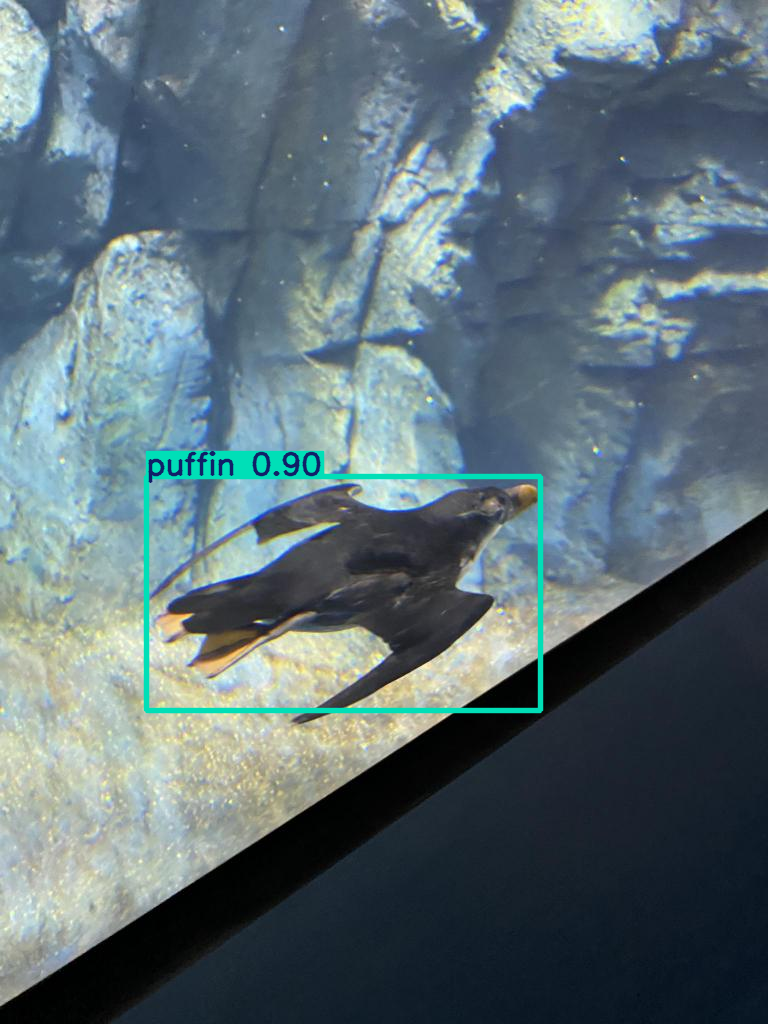

In [11]:
from ultralytics import YOLO

def prediction(image_path):
    # Load the YOLO model with the specified weights
    model = YOLO("/content/runs/detect/train/weights/best.pt")

    # Run the model on the given image path
    results = model(image_path)

    # Process results list
    for result in results:
        boxes = result.boxes  # Bounding box outputs
        masks = result.masks  # Segmentation masks outputs
        keypoints = result.keypoints  # Pose keypoints outputs
        probs = result.probs  # Classification probabilities outputs
        obb = result.obb  # Oriented bounding boxes (OBB) outputs

        # Display the result image with overlays, if available
        result.show()

        # Save the processed result to disk
        result.save(filename="result.jpg")

    return results

# Call the prediction function and process the output
output = prediction('/content/aquarium_pretrain/test/images/IMG_2289_jpeg_jpg.rf.fe2a7a149e7b11f2313f5a7b30386e85.jpg')


# Model Training Analysis

### Augmentations:
No augmentations are applied in the dataset (`augment=False` in the config). This choice preserves the original data structure for initial training, allowing us to assess the model’s performance without added artificial variations.

### Epochs:
The model is set to train for **100 epochs** in the command. This should provide ample training time, enabling the model to learn effectively while also allowing for the evaluation of performance over multiple cycles.

### Hyperparameters:
- **Batch Size**: Set to 16, which achieves a balance between memory efficiency and training speed.
- **Image Size**: 640, chosen to provide good detection resolution for objects.
- **Learning Rate**: Starts at 0.01 and is automatically adjusted by the AdamW optimizer, reaching about 0.000909 during training for stable convergence.
- **Momentum**: 0.9, assisting with faster convergence.
- **Weight Decay**: 0.0005, applied to reduce overfitting by penalizing large weight values.
- **Warmup Epochs**: 3, allowing a gradual increase in learning rate to the target value, which stabilizes training early on.

### Output Metrics:
Key metrics tracked during training include:
- **Box Loss**: Evaluates the accuracy of predicted bounding boxes against the ground truth.
- **Class Loss**: Assesses the accuracy of class predictions.
- **DFL Loss (Distribution Focal Loss)**: Emphasizes difficult-to-classify examples, improving classification.

#### Sample Results from Early Epochs:
- **Epoch 1**: Box Loss = 1.548, Class Loss = 3.84, DFL Loss = 1.277; mAP50 = 0.0465.
- **Epoch 2**: Box Loss = 1.568, Class Loss = 3.078, DFL Loss = 1.239; mAP50 = 0.101.
- **Epoch 3**: Box Loss = 1.657, Class Loss = 2.502, DFL Loss = 1.297; mAP50 = 0.185.
